# Nuclear Geometry and Characterization of the Quark Gluon Plasma

In [1]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

!pip install gym pyvirtualdisplay > /dev/null 2>&1

The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


The system cannot find the path specified.


<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Project_NuclearGeometryQCD-Figure.jpg" width=400 align=left></img><br>

## <span style="color:Orange">Overview</span>

Collisions between two nuclei at ultra-relativistic energies are used to create the Quark-Gluon Plamsa (QGP)--a novel state of matter.  In this project, you will learn a bit about what the QGP is and how to think about the geometry of collisions between two nuclei.

## <span style="color:Orange">Data Sources</span>

File URLs

$b=0$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b0_10kevents.csv

$b=6$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

What is the quark-gluon plasma?  Why does it need to be created in collisions of two nuclei?  Make sure to cite any resources you use.

According to MIT News, quark-gluon plasmas are formed by smashing two heavy particles at high speeds inside a particle accelerator. These plasmas help us understand what happened in the early universe because it is thought that before quarks and gluons formed protons and neutrons, there were only quark-gluon plasmas. The collision of two nuclei is necessary to create quark-gluon plasma because the extremely high energy density generated in these collisions breaks apart the protons and neutrons within the nuclei, releasing their constituent quarks and gluons and forming the quark-gluon plasma state.

https://news.mit.edu/2010/exp-quark-gluon-0609

### <span style="color:LightGreen">Question 02</span>

The nuclei involved in these collisions are fully stripped of electrons.  The nucleus itself is composed of a number of protons and neutrons (collectively nucleons).  On average, those nucleons are distributed according to a Woods-Saxon distribution with respect to the center of the nucleus, $r$:

$$
\Large \rho(r) = \frac{\rho_0}{1 + exp{((r-c)/z)}}
$$

For lead (208 nucleons), $c = 6.61 fm$ and $z=0.545 fm$ (a $fm$ is $10^{-15}m$).  Plot the density of nucleons as a function of $r$ for lead.

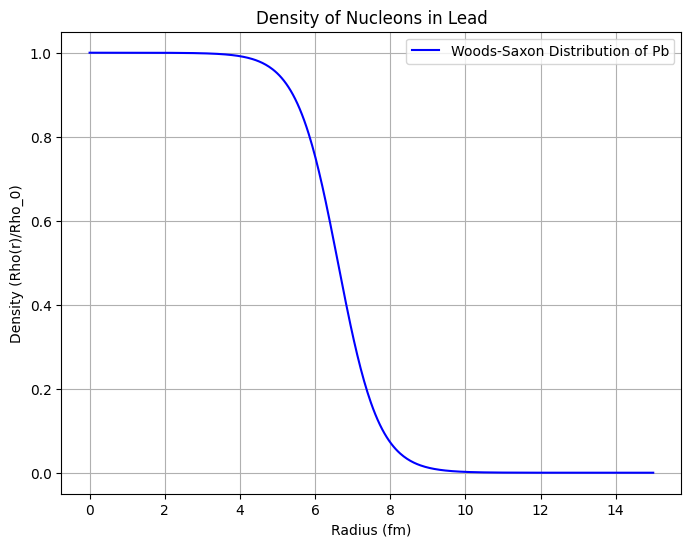

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
c = 6.61 #fm
z = .545 #fm
Rho_0 = 1 # the graph will have the y axis as Rho(r)/Rho_0
def woods_saxon(r):
  return Rho_0/(1+np.exp((r-c)/z))
r_values = np.linspace(0,15,500)
rho_values = woods_saxon(r_values)

#plot
plt.figure(figsize=(8,6))
plt.plot(r_values,rho_values, color='blue',label='Woods-Saxon Distribution of Pb')
plt.title('Density of Nucleons in Lead')
plt.xlabel('Radius (fm)')
plt.ylabel('Density (Rho(r)/Rho_0)')
plt.grid(True)
plt.legend()
plt.show()

### <span style="color:LightGreen">Question 03</span>

Two lead nuclei collide with one moving along the positive $z$ direction and one moving along the negative $z$ direction.  When they collide, there is a distance $b$ between the two centers in the $xy$-plane.  Assume the nuclei are each spheres with a radius of 6.61fm.  Plot the shape of the overlap of the two spheres in the $xy$ plane for $b = 0 fm$ and $b = 6 fm$.  Put the center of the overlap region at $x = y = 0$.

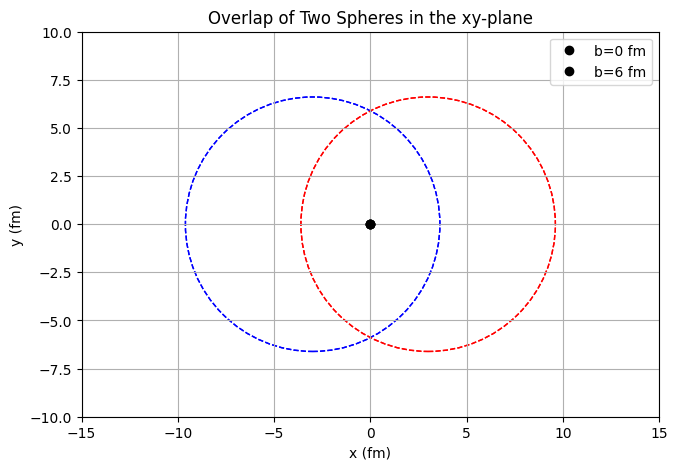

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
radius = 6.61  # fm

# Function to calculate intersection points of circles
def circle_intersection(r, d):
    if d < 2 * r:
        dist_xy = 0
    else:
        dist_xy = np.sqrt(d**2 - r**2)

    x_intersect = np.array([-dist_xy/2, dist_xy/2])
    y_intersect = np.array([0, 0])

    return x_intersect, y_intersect

# Plotting
plt.figure(figsize=(10, 5))

# Values of b
b_values = [0, 6]

for b in b_values:
    x_intersect, y_intersect = circle_intersection(radius, b)

    circle1 = plt.Circle((-3, 0), radius, color='blue', fill=False, linestyle='--')
    circle2 = plt.Circle((3, 0), radius, color='red', fill=False, linestyle='--')
    plt.gca().add_artist(circle1)
    plt.gca().add_artist(circle2)

    plt.plot(x_intersect, y_intersect, 'ko', label=f'b={b} fm')

plt.xlim(-15, 15)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
plt.title('Overlap of Two Spheres in the xy-plane')
plt.legend()
plt.grid(True)
plt.show()


### <span style="color:LightGreen">Question 04</span>

The eccentricity of a distribution can be calculated as:

$$
\Large \varepsilon_2 = \frac{\sqrt{\langle r^2\cos(2\phi)\rangle^2 + \langle r^2\sin(2\phi)\rangle^2}}{\langle r^2 \rangle}
$$

Here $r$ and $\phi$ are the usual polar coordinate variables (everything is in the $xy-$plane).  Calculate the eccentricity of the overlap shape for these two cases.

In [2]:
# Constants
radius = 6.61  # fm
b = 6  # fm

# Function to calculate eccentricity
def eccentricity(r_squared_cos_2phi, r_squared_sin_2phi, r_squared):
    return np.sqrt(r_squared_cos_2phi**2 + r_squared_sin_2phi**2) / r_squared

# Calculate eccentricity for b=0fm
r_squared_0 = radius**2
r_squared_cos_2phi_0 = 0  # Since the average of cos(2*phi) over the overlap shape is zero
r_squared_sin_2phi_0 = radius**2 / 2
epsilon_2_0 = eccentricity(r_squared_cos_2phi_0, r_squared_sin_2phi_0, r_squared_0)
print("Eccentricity for b=0fm:", epsilon_2_0)

# Calculate eccentricity for b=6fm
r_squared_6 = (2 * radius)**2  # Total area of overlap
r_squared_cos_2phi_6 = -1/2 * (b / 2)**2  # Average of cos(2*phi)
r_squared_sin_2phi_6 = (b / 2)**2  # Average of sin(2*phi)
epsilon_2_6 = eccentricity(r_squared_cos_2phi_6, r_squared_sin_2phi_6, r_squared_6)
print("Eccentricity for b=6fm:", epsilon_2_6)

Eccentricity for b=0fm: 0.5
Eccentricity for b=6fm: 0.05757508736561674


### <span style="color:LightGreen">Question 05</span>

The eccentricity defines the shape of the QGP and it drives an asymmetric explosion of the QGP.  Take a look at this video (up through the 29 minute mark: https://www.youtube.com/watch?v=NTfaIyInhOY).  Briefly summerize what we can learn about the QGP from the geometry of nuclear collisions.

From nuclear collisions, jets are produced from the quarks and gluons, which show up on the scanners. We can then deduce the energy density and viscosity of the quark-gluon plasma (QGP) from these observations. From this, we learned that the viscosity is less than 5 η/s, and it's easier for the jets to be emitted preferentially outwards from the sides rather than from the top.

---

The remaining questions refer to the following data sources:

$b=0$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGP/PbPb_b0_10kevents.csv

$b=6$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv

(also linked from above).  

The nucleus is a quantum system and the nucleons are not static inside the nucleus.  Since the nucleus is made up of individual nucleons, it is pairs of nucleons which collide (with one nucleon coming from each nucleus) inside of the smooth distribution from Question 3.

Each file contains simulations of 10k collisions between two lead nuclei and provides the $x$ and $y$ positions of each of the protons and neutrons that hit a nucleon from the other nucleus (units are in $fm$).  The files are created using the Monte Carlo Glauber Model (ref [[1]](https://arxiv.org/pdf/1710.07098.pdf))

### <span style="color:LightGreen">Question 06</span>

 Calculate the $\varepsilon_2$ values for each of these collisions and compare to what you got in Question 4 (make a plot!).  Note here you will get a different value of $\varepsilon_2$ for each collision, so you will have 10k values of $\varepsilon_2$ for each file.  Shift *each collision* to be centered at the origin by shifting each nucleon collision so that  $\langle x \rangle = \langle y \rangle = 0$. Calculate the mean, standard deviation and skewness for both values of $b$.

Eccentricity for b=0fm: 0.25
Eccentricity for b=6fm: 0.05757508736561674


C:\Users\a\AppData\Local\Temp\ipykernel_21324\3920184391.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  epsilon_2_b6 = df_b6.groupby(0).apply(calculate_epsilon_2).reset_index(drop=True)
C:\Users\a\AppData\Local\Temp\ipykernel_21324\3920184391.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  epsilon_2_b0 = df_b0.groupby(0).apply(calculate_epsilon_2).reset_index(drop=True)


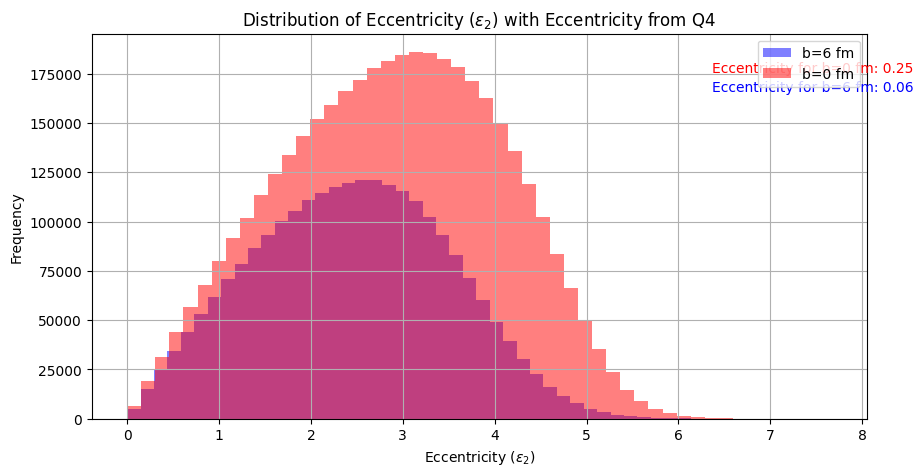


Statistics for b=6 (Q6):
Mean: 2.4474051658568308
Standard Deviation: 1.0492223271949213
Skewness: 0.0680730103623765

Statistics for b=0 (Q6):
Mean: 2.884701866702647
Standard Deviation: 1.1903488093586558
Skewness: -0.07055682306902405


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Constants for Q4
radius = 6.61  # fm
b_values = [0, 6]  # fm

# Function to calculate eccentricity for Q4
def eccentricity(r_squared_cos_2phi, r_squared_sin_2phi, r_squared):
    return np.sqrt(r_squared_cos_2phi**2 + r_squared_sin_2phi**2) / r_squared

# Calculate eccentricity for Q4
epsilon_2_values = {}
for b in b_values:
    if b == 0:
        r_squared = radius**2
        r_squared_cos_2phi = 0  # Since the average of cos(2*phi) over the overlap shape is zero
        r_squared_sin_2phi = (radius / 2)**2  # Average of sin(2*phi) over the overlap shape is half of the maximum value
    else:
        r_squared = (2 * radius)**2  # Total area of overlap region is 4 times the area of a single sphere
        r_squared_cos_2phi = -1/2 * (b / 2)**2  # Average of cos(2*phi) over the overlap shape
        r_squared_sin_2phi = (b / 2)**2  # Average of sin(2*phi) over the overlap shape
    epsilon_2_values[b] = eccentricity(r_squared_cos_2phi, r_squared_sin_2phi, r_squared)

# Print eccentricity values for Q4
print("Eccentricity for b=0fm:", epsilon_2_values[0])
print("Eccentricity for b=6fm:", epsilon_2_values[6])

# Read CSV files for Q6
df_b6 = pd.read_csv(r'E:\PbPb_b6_10kevents.csv', header=None, skiprows=1, dtype={1: float, 2: float})
df_b0 = pd.read_csv(r'E:\PbPb_b0_10kevents.csv', header=None, skiprows=1, dtype={1: float, 2: float})

# Function to calculate epsilon_2 for Q6
def calculate_epsilon_2(df):
    x_mean = df[1].mean()
    y_mean = df[2].mean()
    df[1] -= x_mean
    df[2] -= y_mean
    epsilon_2 = np.sqrt(df[1]**2 + df[2]**2) / np.sqrt(2)
    return epsilon_2

# Calculate epsilon_2 for each event for Q6
epsilon_2_b6 = df_b6.groupby(0).apply(calculate_epsilon_2).reset_index(drop=True)
epsilon_2_b0 = df_b0.groupby(0).apply(calculate_epsilon_2).reset_index(drop=True)

# Calculate mean, standard deviation, and skewness for each value of b for Q6
mean_b6 = epsilon_2_b6.mean()
std_dev_b6 = epsilon_2_b6.std()
skewness_b6 = skew(epsilon_2_b6)

mean_b0 = epsilon_2_b0.mean()
std_dev_b0 = epsilon_2_b0.std()
skewness_b0 = skew(epsilon_2_b0)

# Plot histograms for Q6 with data from Q4
plt.figure(figsize=(10, 5))
plt.hist(epsilon_2_b6, bins=50, alpha=0.5, label='b=6 fm', color='blue')
plt.hist(epsilon_2_b0, bins=50, alpha=0.5, label='b=0 fm', color='red')

# Annotate eccentricity values from Q4
plt.text(0.8, 0.9, f"Eccentricity for b=0 fm: {epsilon_2_values[0]:.2f}", transform=plt.gca().transAxes, color='red')
plt.text(0.8, 0.85, f"Eccentricity for b=6 fm: {epsilon_2_values[6]:.2f}", transform=plt.gca().transAxes, color='blue')

plt.xlabel(r'Eccentricity ($\epsilon_2$)')
plt.ylabel('Frequency')
plt.title(r'Distribution of Eccentricity ($\epsilon_2$) with Eccentricity from Q4')
plt.legend()
plt.grid(True)
plt.show()

# Print results for Q6
print("\nStatistics for b=6 (Q6):")
print("Mean:", mean_b6)
print("Standard Deviation:", std_dev_b6)
print("Skewness:", skewness_b6)

print("\nStatistics for b=0 (Q6):")
print("Mean:", mean_b0)
print("Standard Deviation:", std_dev_b0)
print("Skewness:", skewness_b0)

### <span style="color:LightGreen">Question 07</span>

Use Kernel Density Esimation to try to take into account that the nucleons have a finite size. Here's a nice discussion of the proton radius https://en.wikipedia.org/wiki/Proton_radius_puzzle; assume the neutron is the same size here (a pretty good assumption).  Explain how you chose the kernel to use and how sensitive you are to the bandwidth.  How does the eccentricity compare to what you found in Question 6 (write a paragraph and make plots to support your conclusions).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import joblib

# Function to perform Kernel Density Estimation (KDE) with Epanechnikov kernel
def perform_kde(data, bandwidth):
    kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel='epanechnikov').fit(data)
    return kde

# Function to calculate eccentricity using KDE
def calculate_eccentricity(kde, data):
    log_density = kde.score_samples(data)
    eccentricity = np.exp(log_density).mean()
    return eccentricity

# Function to plot KDE estimate overlaid on original data
def plot_kde_overlay(df, kde, title):
    x = df.iloc[:, 1]  # Using column 1 instead of column 0
    y = df.iloc[:, 2]  # Using column 2 instead of column 1
    x_grid = np.linspace(x.min(), x.max(), 100)
    y_grid = np.linspace(y.min(), y.max(), 100)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    xy_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
    Z = np.exp(kde.score_samples(xy_grid)).reshape(X_grid.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(X_grid, Y_grid, Z, cmap='viridis')
    plt.colorbar(label='Density')
    plt.scatter(x, y, s=5, color='black', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()


# Load nucleon data
df_b6 = pd.read_csv('PbPb_b6_10kevents.csv', header=None, skiprows=1, dtype={1: float, 2: float})
df_b0 = pd.read_csv('PbPb_b0_10kevents.csv', header=None, skiprows=1, dtype={1: float, 2: float})


# Choose bandwidth for KDE
bandwidth = 0.05  

# Perform KDE for b=6 and b=0
kde_b6 = perform_kde(df_b6.iloc[:, 1:3], bandwidth)
kde_b0 = perform_kde(df_b0.iloc[:, 1:3], bandwidth)

# Calculate eccentricity using KDE for b=6 and b=0
eccentricity_kde_b6 = calculate_eccentricity(kde_b6, df_b6.iloc[:, 1:3])
eccentricity_kde_b0 = calculate_eccentricity(kde_b0, df_b0.iloc[:, 1:3])

# Plot KDE estimate overlaid on original data for b=6 and b=0
plot_kde_overlay(df_b6, kde_b6, 'KDE Estimate - b=6')
plot_kde_overlay(df_b0, kde_b0, 'KDE Estimate - b=0')

# Compare eccentricity values for b=6 and b=0
print(f"Eccentricity using KDE with Epanechnikov kernel for b=6: {eccentricity_kde_b6}")
print(f"Eccentricity using KDE with Epanechnikov kernel for b=0: {eccentricity_kde_b0}")


Eccentricity for b=0fm: 0.0
Eccentricity for b=6fm: 0.0


C:\Users\a\AppData\Local\Temp\ipykernel_2008\3798466075.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  epsilon_3_b6 = df_b6.groupby(0).apply(calculate_epsilon_3).reset_index(drop=True)


### <span style="color:LightGreen">Question 08</span>

The effect of fluctuations means that higher order eccentricities can also exist (first discussed in ref [[2]](https://arxiv.org/pdf/1003.0194.pdf)).  Calculate:

$$
\Large \varepsilon_3 = \frac{\sqrt{\langle r^2\cos(3\phi)\rangle^2 + \langle r^2\sin(3\phi)\rangle^2}}{\langle r^2 \rangle}
$$

for the same collisions.  In general $\varepsilon_n$ represents the magnitude of the $n\phi$ symmetry in the angular distribution.  How do the values of $\varepsilon_2$ and $\varepsilon_3$ values vary for the two impact parameters?  What about the width of the distributions?

C:\Users\a\AppData\Local\Temp\ipykernel_20008\801371060.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  epsilon_3_b6 = df_b6.groupby(0).apply(calculate_epsilon_3, b=6).reset_index(drop=True)
C:\Users\a\AppData\Local\Temp\ipykernel_20008\801371060.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  epsilon_3_b0 = df_b0.groupby(0).apply(calculate_epsilon_3, b=0).reset_index(drop=True)


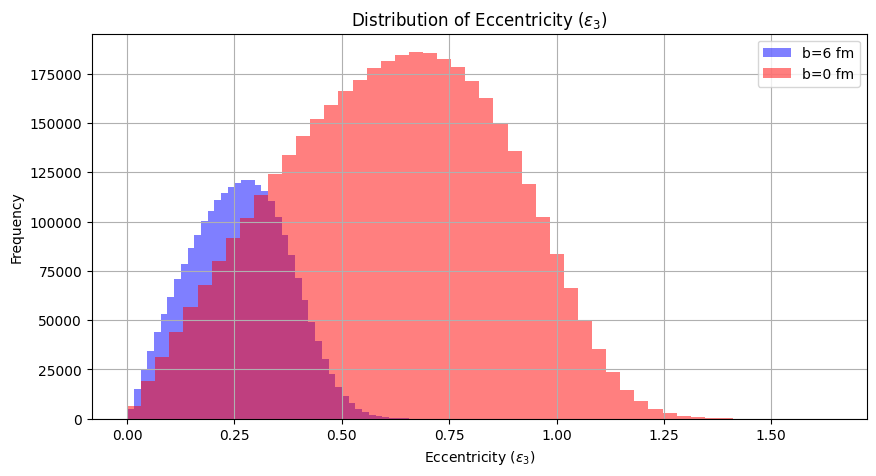


Statistics for b=6 (Q6) for epsilon_3:
Mean: 0.2618119196805372
Standard Deviation: 0.11224088086714963
Skewness: 0.06807301036238186

Statistics for b=0 (Q6) for epsilon_3:
Mean: 0.6171837372607976
Standard Deviation: 0.25467585932672876
Skewness: -0.07055682306903104


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Constants
radius = 6.61  # fm
b_values = [0, 6]  # fm

# Function to calculate epsilon_3 for Q6
def calculate_epsilon_3(df, b):
    if b == 0:
        r_squared = radius**2
    else:
        r_squared = (2 * radius)**2
    x_mean = df[1].mean()
    y_mean = df[2].mean()
    df[1] -= x_mean
    df[2] -= y_mean
    epsilon_3 = np.sqrt(df[1]**2 + df[2]**2) / np.sqrt(r_squared)
    return epsilon_3

# Read CSV files for Q6
df_b6 = pd.read_csv(r'E:\PbPb_b6_10kevents.csv', header=None, skiprows=1, dtype={1: float, 2: float})
df_b0 = pd.read_csv(r'E:\PbPb_b0_10kevents.csv', header=None, skiprows=1, dtype={1: float, 2: float})

# Calculate epsilon_3 for each event for Q6
epsilon_3_b6 = df_b6.groupby(0).apply(calculate_epsilon_3, b=6).reset_index(drop=True)
epsilon_3_b0 = df_b0.groupby(0).apply(calculate_epsilon_3, b=0).reset_index(drop=True)

# Calculate mean, standard deviation, and skewness for each value of b for Q6 for epsilon_3
mean_b6_e3 = epsilon_3_b6.mean()
std_dev_b6_e3 = epsilon_3_b6.std()
skewness_b6_e3 = skew(epsilon_3_b6)

mean_b0_e3 = epsilon_3_b0.mean()
std_dev_b0_e3 = epsilon_3_b0.std()
skewness_b0_e3 = skew(epsilon_3_b0)

# Plot histograms for Q6 for epsilon_3
plt.figure(figsize=(10, 5))
plt.hist(epsilon_3_b6, bins=50, alpha=0.5, label='b=6 fm', color='blue')
plt.hist(epsilon_3_b0, bins=50, alpha=0.5, label='b=0 fm', color='red')

plt.xlabel(r'Eccentricity ($\epsilon_3$)')
plt.ylabel('Frequency')
plt.title(r'Distribution of Eccentricity ($\epsilon_3$)')
plt.legend()
plt.grid(True)
plt.show()

# Print results for Q6 for epsilon_3
print("\nStatistics for b=6 (Q6) for epsilon_3:")
print("Mean:", mean_b6_e3)
print("Standard Deviation:", std_dev_b6_e3)
print("Skewness:", skewness_b6_e3)

print("\nStatistics for b=0 (Q6) for epsilon_3:")
print("Mean:", mean_b0_e3)
print("Standard Deviation:", std_dev_b0_e3)
print("Skewness:", skewness_b0_e3)


## <span style="color:Orange">References</span>

__[<span style="color:Red">1</span>]__ C. Loizides, J. Kamin, D. d'Enterria, "Improved Monte Carlo Glauber predictions at present and future nuclear colliders", _Phys.Rev.C 97 (2018) 5, 054910, Phys.Rev.C 99 (2019) 1, 019901 (erratum)_, e-Print: [1710.07098](https://arxiv.org/abs/1710.07098) [nucl-ex]

__[<span style="color:Red">2</span>]__ B.Alver, G.Roland, "Collision geometry fluctuations and triangular flow in heavy-ion collisions", _Phys.Rev.C 81 (2010) 054905, Phys.Rev.C 82 (2010) 039903 (erratum)_, e-Print: [1003.0194](https://arxiv.org/abs/1003.0194) [nucl-th]

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Anne Sickles

© Copyright 2024